In [1]:
#XGBoost

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
print(xgb.__version__)

0.80


In [5]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [6]:
cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [7]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [8]:
X_train, X_test, y_train, y_test=train_test_split(X_features,y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [10]:
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [11]:
params={'max_depth':3,
       'eta':0.1,
       'dbjective':'binary:logistic',
       'eval_metric':'logloss',
       'early_stoppings':100,
       }
num_rounds=400

In [12]:
wlist=[(dtrain, 'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-logloss:0.606807	eval-logloss:0.609825
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-logloss:0.535601	eval-logloss:0.542703
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-logloss:0.476152	eval-logloss:0.486155
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-logloss:0.425167	eval-logloss:0.439255
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-logloss:0.381758	eval-logloss:0.399824
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-logloss:0.34181	eval-logloss:0.364606
[23:45:46] src/tree/updater_prune.c

[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[51]	train-logloss:0.024762	eval-logloss:0.09173
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[52]	train-logloss:0.024735	eval-logloss:0.091797
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[53]	train-logloss:0.024376	eval-logloss:0.091564
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[54]	train-logloss:0.024041	eval-logloss:0.091517
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[55]	train-logloss:0.023829	eval-logloss:0.091533
[23:45:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[56]	train-logloss:0.023716	eval-logloss:0.091374
[23:45:46] src/tree/updater_pru

[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[102]	train-logloss:0.016451	eval-logloss:0.090918
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[103]	train-logloss:0.016386	eval-logloss:0.090889
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[104]	train-logloss:0.016169	eval-logloss:0.090953
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[105]	train-logloss:0.01611	eval-logloss:0.091077
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[106]	train-logloss:0.016139	eval-logloss:0.091136
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[107]	train-logloss:0.015972	eval-logloss:0.09114
[23:45:47] src/tree/upda

[152]	train-logloss:0.011676	eval-logloss:0.089641
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[153]	train-logloss:0.011623	eval-logloss:0.089601
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[154]	train-logloss:0.011565	eval-logloss:0.089616
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[155]	train-logloss:0.011547	eval-logloss:0.089765
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[156]	train-logloss:0.011429	eval-logloss:0.089949
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[157]	train-logloss:0.011401	eval-logloss:0.089869
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[158]	train-logloss:0.0

[203]	train-logloss:0.008888	eval-logloss:0.089793
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[204]	train-logloss:0.008862	eval-logloss:0.089778
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[205]	train-logloss:0.008866	eval-logloss:0.089703
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[206]	train-logloss:0.008779	eval-logloss:0.089715
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[207]	train-logloss:0.008718	eval-logloss:0.089773
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[208]	train-logloss:0.008671	eval-logloss:0.089675
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[209]	train-logloss:0.

[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[255]	train-logloss:0.006731	eval-logloss:0.090175
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[256]	train-logloss:0.006696	eval-logloss:0.090216
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[257]	train-logloss:0.00664	eval-logloss:0.090245
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[258]	train-logloss:0.006614	eval-logloss:0.090315
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[259]	train-logloss:0.006523	eval-logloss:0.090271
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[260]	train-logloss:0.00649	eval-logloss:0.090265
[23:45:47] src/tree/upda

[305]	train-logloss:0.005362	eval-logloss:0.09103
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[306]	train-logloss:0.005359	eval-logloss:0.09105
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[307]	train-logloss:0.005336	eval-logloss:0.091057
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[308]	train-logloss:0.005324	eval-logloss:0.091069
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[309]	train-logloss:0.00528	eval-logloss:0.091132
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[310]	train-logloss:0.005223	eval-logloss:0.091105
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[311]	train-logloss:0.005

[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[357]	train-logloss:0.004158	eval-logloss:0.091355
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[358]	train-logloss:0.00413	eval-logloss:0.091337
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[359]	train-logloss:0.00408	eval-logloss:0.091346
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[360]	train-logloss:0.004069	eval-logloss:0.091347
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[361]	train-logloss:0.004056	eval-logloss:0.091345
[23:45:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[362]	train-logloss:0.004047	eval-logloss:0.091386
[23:45:48] src/tree/upda

In [14]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[ 0.708  0.024  0.64   0.435  0.983  1.014  0.988  1.029  0.98  -0.005]


In [15]:
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
get_clf_eval(y_test, preds) #평가에서 만든 함수

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9600


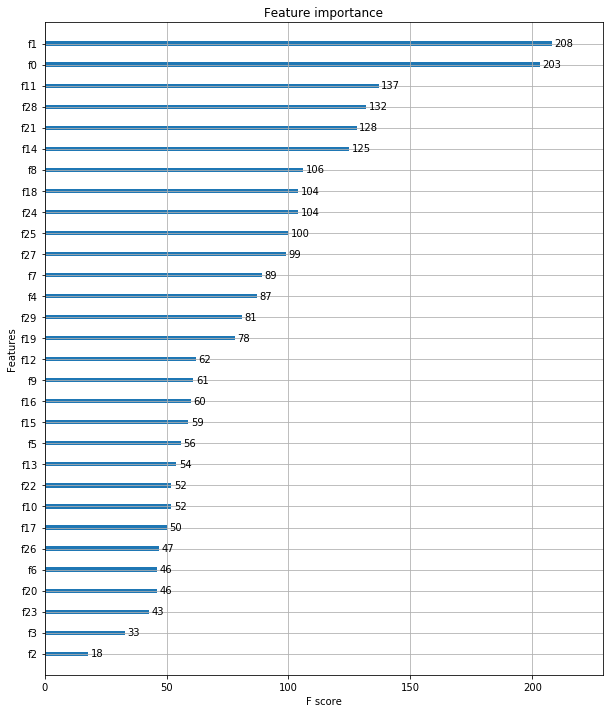

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [21]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds= xgb_wrapper.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [30]:
get_clf_eval(y_test, w_preds) #3장에서 만들기

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9530


In [25]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train,early_stopping_rounds=100, eval_metric="logloss",
               eval_set=evals, verbose=True)
w100_preds= xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086291
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [32]:
get_clf_eval(y_test, w100_preds) #3장에서 만들기

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9530


In [33]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test , ws10_preds)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


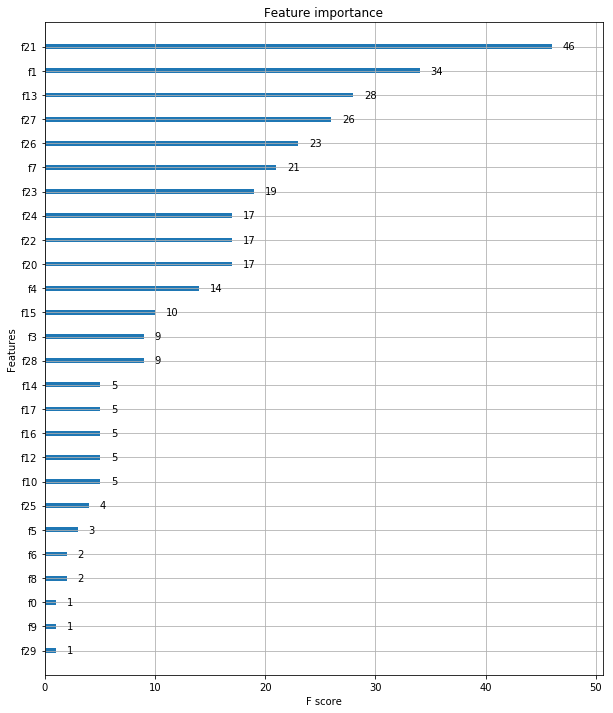

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

In [41]:
#lightGBM

In [42]:
import lightgbm

print(lightgbm.__version__)

2.2.2


In [43]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9330


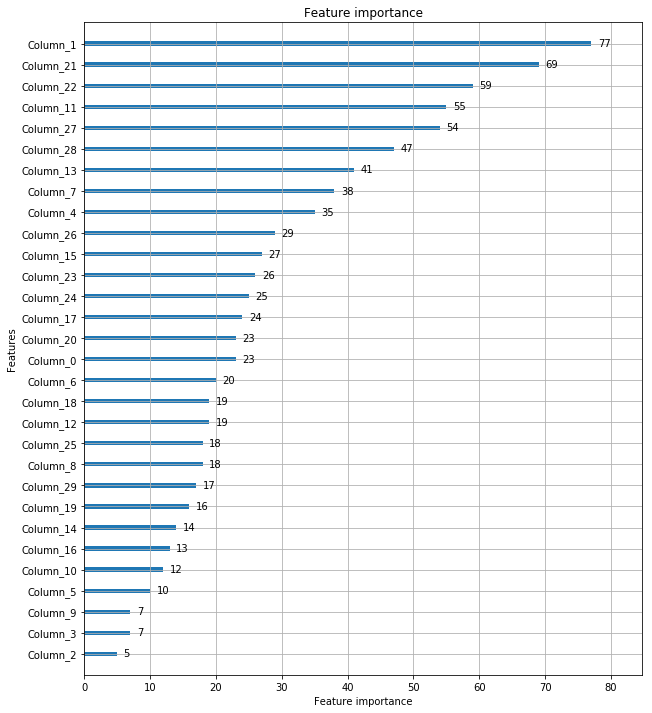

In [47]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

In [48]:
#캐글 산탄데르 고객 만족 예측

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("4_data/train_san.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [50]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [51]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [52]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [53]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [56]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.803125	validation_1-auc:0.802563
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.812106	validation_1-auc:0.809871
[2]	validation_0-auc:0.800827	validation_1-auc:0.803884
[3]	validation_0-auc:0.81741	validation_1-auc:0.818242
[4]	validation_0-auc:0.809135	validation_1-auc:0.813688
[5]	validation_0-auc:0.816184	validation_1-auc:0.822033
[6]	validation_0-auc:0.829038	validation_1-auc:0.829229
[7]	validation_0-auc:0.818428	validation_1-auc:0.820598
[8]	validation_0-auc:0.82484	validation_1-auc:0.825886
[9]	validation_0-auc:0.828268	validation_1-auc:0.827756
[10]	validation_0-auc:0.828564	validation_1-auc:0.826696
[11]	validation_0-auc:0.826549	validation_1-auc:0.823761
[12]	validation_0-auc:0.825155	validation_1-auc:0.822388
[13]	validation_0-auc:0.821696	validation_1-auc:0.820635
[14]	validation_0-auc:0.82695	validation_1-auc:0.82465
[1

[59]	validation_0-auc:0.866488	validation_1-auc:0.844298
[60]	validation_0-auc:0.866891	validation_1-auc:0.844308
[61]	validation_0-auc:0.867175	validation_1-auc:0.844355
[62]	validation_0-auc:0.867688	validation_1-auc:0.844342
[63]	validation_0-auc:0.867817	validation_1-auc:0.84451
[64]	validation_0-auc:0.868012	validation_1-auc:0.844567
[65]	validation_0-auc:0.868296	validation_1-auc:0.844331
[66]	validation_0-auc:0.868619	validation_1-auc:0.844608
[67]	validation_0-auc:0.868674	validation_1-auc:0.844529
[68]	validation_0-auc:0.868815	validation_1-auc:0.844412
[69]	validation_0-auc:0.869473	validation_1-auc:0.84427
[70]	validation_0-auc:0.869626	validation_1-auc:0.844274
[71]	validation_0-auc:0.869956	validation_1-auc:0.844098
[72]	validation_0-auc:0.870104	validation_1-auc:0.84414
[73]	validation_0-auc:0.870304	validation_1-auc:0.84428
[74]	validation_0-auc:0.870724	validation_1-auc:0.844784
[75]	validation_0-auc:0.871036	validation_1-auc:0.844536
[76]	validation_0-auc:0.871093	vali

[9]	validation_0-auc:0.829586	validation_1-auc:0.828729
[10]	validation_0-auc:0.829222	validation_1-auc:0.827035
[11]	validation_0-auc:0.827852	validation_1-auc:0.825739
[12]	validation_0-auc:0.826456	validation_1-auc:0.824152
[13]	validation_0-auc:0.824016	validation_1-auc:0.822555
[14]	validation_0-auc:0.828589	validation_1-auc:0.826462
[15]	validation_0-auc:0.82883	validation_1-auc:0.826064
[16]	validation_0-auc:0.832241	validation_1-auc:0.828538
[17]	validation_0-auc:0.830083	validation_1-auc:0.82762
[18]	validation_0-auc:0.829771	validation_1-auc:0.826144
[19]	validation_0-auc:0.828889	validation_1-auc:0.824766
[20]	validation_0-auc:0.833163	validation_1-auc:0.82842
[21]	validation_0-auc:0.832992	validation_1-auc:0.828204
[22]	validation_0-auc:0.836564	validation_1-auc:0.830491
[23]	validation_0-auc:0.83567	validation_1-auc:0.829365
[24]	validation_0-auc:0.834453	validation_1-auc:0.828113
[25]	validation_0-auc:0.833308	validation_1-auc:0.826895
[26]	validation_0-auc:0.836743	valid

[71]	validation_0-auc:0.866437	validation_1-auc:0.843934
[72]	validation_0-auc:0.866597	validation_1-auc:0.843833
[73]	validation_0-auc:0.866641	validation_1-auc:0.843966
[74]	validation_0-auc:0.866807	validation_1-auc:0.844037
[75]	validation_0-auc:0.866972	validation_1-auc:0.843948
[76]	validation_0-auc:0.867476	validation_1-auc:0.844156
[77]	validation_0-auc:0.867546	validation_1-auc:0.844285
[78]	validation_0-auc:0.867695	validation_1-auc:0.844251
[79]	validation_0-auc:0.867908	validation_1-auc:0.844267
[80]	validation_0-auc:0.868058	validation_1-auc:0.844205
[81]	validation_0-auc:0.868274	validation_1-auc:0.844247
[82]	validation_0-auc:0.868287	validation_1-auc:0.844173
[83]	validation_0-auc:0.868359	validation_1-auc:0.844256
[84]	validation_0-auc:0.868805	validation_1-auc:0.844465
[85]	validation_0-auc:0.869109	validation_1-auc:0.844576
[86]	validation_0-auc:0.869252	validation_1-auc:0.844608
[87]	validation_0-auc:0.869345	validation_1-auc:0.844522
[88]	validation_0-auc:0.869655	

[11]	validation_0-auc:0.839917	validation_1-auc:0.829354
[12]	validation_0-auc:0.838492	validation_1-auc:0.827917
[13]	validation_0-auc:0.837123	validation_1-auc:0.826974
[14]	validation_0-auc:0.841806	validation_1-auc:0.829865
[15]	validation_0-auc:0.842325	validation_1-auc:0.828282
[16]	validation_0-auc:0.845442	validation_1-auc:0.8307
[17]	validation_0-auc:0.84416	validation_1-auc:0.830243
[18]	validation_0-auc:0.84391	validation_1-auc:0.829356
[19]	validation_0-auc:0.844251	validation_1-auc:0.82759
[20]	validation_0-auc:0.848231	validation_1-auc:0.829971
[21]	validation_0-auc:0.848016	validation_1-auc:0.829012
[22]	validation_0-auc:0.851941	validation_1-auc:0.830743
[23]	validation_0-auc:0.851644	validation_1-auc:0.828983
[24]	validation_0-auc:0.85063	validation_1-auc:0.82895
[25]	validation_0-auc:0.850385	validation_1-auc:0.828359
[26]	validation_0-auc:0.853411	validation_1-auc:0.830946
[27]	validation_0-auc:0.856233	validation_1-auc:0.833292
[28]	validation_0-auc:0.855597	validat

[69]	validation_0-auc:0.890335	validation_1-auc:0.845159
[70]	validation_0-auc:0.890453	validation_1-auc:0.845272
[71]	validation_0-auc:0.890726	validation_1-auc:0.845458
[72]	validation_0-auc:0.890849	validation_1-auc:0.845396
[73]	validation_0-auc:0.891106	validation_1-auc:0.845473
[74]	validation_0-auc:0.891399	validation_1-auc:0.845353
[75]	validation_0-auc:0.891621	validation_1-auc:0.845148
[76]	validation_0-auc:0.891851	validation_1-auc:0.845163
[77]	validation_0-auc:0.892078	validation_1-auc:0.845195
[78]	validation_0-auc:0.892266	validation_1-auc:0.845191
[79]	validation_0-auc:0.892433	validation_1-auc:0.845018
[80]	validation_0-auc:0.892582	validation_1-auc:0.844979
[81]	validation_0-auc:0.892742	validation_1-auc:0.844822
Stopping. Best iteration:
[51]	validation_0-auc:0.884591	validation_1-auc:0.845986

[0]	validation_0-auc:0.817353	validation_1-auc:0.81178
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation

[40]	validation_0-auc:0.86921	validation_1-auc:0.838321
[41]	validation_0-auc:0.870675	validation_1-auc:0.839123
[42]	validation_0-auc:0.870801	validation_1-auc:0.83865
[43]	validation_0-auc:0.87098	validation_1-auc:0.837766
[44]	validation_0-auc:0.871855	validation_1-auc:0.838151
[45]	validation_0-auc:0.872753	validation_1-auc:0.83923
[46]	validation_0-auc:0.873119	validation_1-auc:0.839913
[47]	validation_0-auc:0.873661	validation_1-auc:0.840285
[48]	validation_0-auc:0.874708	validation_1-auc:0.841114
[49]	validation_0-auc:0.875104	validation_1-auc:0.840245
[50]	validation_0-auc:0.87545	validation_1-auc:0.84027
[51]	validation_0-auc:0.875906	validation_1-auc:0.840637
[52]	validation_0-auc:0.876574	validation_1-auc:0.84083
[53]	validation_0-auc:0.877028	validation_1-auc:0.840907
[54]	validation_0-auc:0.8774	validation_1-auc:0.841049
[55]	validation_0-auc:0.877485	validation_1-auc:0.840724
[56]	validation_0-auc:0.877771	validation_1-auc:0.840539
[57]	validation_0-auc:0.878054	validatio

[4]	validation_0-auc:0.83101	validation_1-auc:0.824894
[5]	validation_0-auc:0.833257	validation_1-auc:0.827687
[6]	validation_0-auc:0.839003	validation_1-auc:0.831125
[7]	validation_0-auc:0.837563	validation_1-auc:0.828304
[8]	validation_0-auc:0.839028	validation_1-auc:0.828506
[9]	validation_0-auc:0.84318	validation_1-auc:0.830799
[10]	validation_0-auc:0.844112	validation_1-auc:0.829166
[11]	validation_0-auc:0.845359	validation_1-auc:0.828965
[12]	validation_0-auc:0.844498	validation_1-auc:0.827634
[13]	validation_0-auc:0.844019	validation_1-auc:0.827467
[14]	validation_0-auc:0.847199	validation_1-auc:0.829228
[15]	validation_0-auc:0.846259	validation_1-auc:0.828458
[16]	validation_0-auc:0.84853	validation_1-auc:0.831608
[17]	validation_0-auc:0.847608	validation_1-auc:0.829815
[18]	validation_0-auc:0.847089	validation_1-auc:0.82811
[19]	validation_0-auc:0.846559	validation_1-auc:0.827039
[20]	validation_0-auc:0.850348	validation_1-auc:0.830571
[21]	validation_0-auc:0.849733	validation

[62]	validation_0-auc:0.866552	validation_1-auc:0.836443
[63]	validation_0-auc:0.866615	validation_1-auc:0.836367
[64]	validation_0-auc:0.866915	validation_1-auc:0.836174
[65]	validation_0-auc:0.867214	validation_1-auc:0.836243
[66]	validation_0-auc:0.867443	validation_1-auc:0.836236
[67]	validation_0-auc:0.867975	validation_1-auc:0.836458
[68]	validation_0-auc:0.868073	validation_1-auc:0.836469
[69]	validation_0-auc:0.868492	validation_1-auc:0.836482
Stopping. Best iteration:
[39]	validation_0-auc:0.857173	validation_1-auc:0.840037

[0]	validation_0-auc:0.805402	validation_1-auc:0.800555
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813595	validation_1-auc:0.808698
[2]	validation_0-auc:0.812229	validation_1-auc:0.810531
[3]	validation_0-auc:0.818556	validation_1-auc:0.815152
[4]	validation_0-auc:0.825733	validation_1-auc:0.821962
[5]	validation_0-auc:0.

[52]	validation_0-auc:0.865112	validation_1-auc:0.842576
[53]	validation_0-auc:0.86573	validation_1-auc:0.842481
[54]	validation_0-auc:0.86602	validation_1-auc:0.842428
[55]	validation_0-auc:0.866234	validation_1-auc:0.842359
[56]	validation_0-auc:0.866348	validation_1-auc:0.842283
[57]	validation_0-auc:0.866708	validation_1-auc:0.842414
[58]	validation_0-auc:0.867068	validation_1-auc:0.842295
[59]	validation_0-auc:0.867208	validation_1-auc:0.84224
[60]	validation_0-auc:0.867398	validation_1-auc:0.842447
[61]	validation_0-auc:0.867773	validation_1-auc:0.842282
[62]	validation_0-auc:0.868383	validation_1-auc:0.84211
[63]	validation_0-auc:0.868577	validation_1-auc:0.842138
[64]	validation_0-auc:0.869036	validation_1-auc:0.842013
[65]	validation_0-auc:0.869434	validation_1-auc:0.842344
[66]	validation_0-auc:0.869538	validation_1-auc:0.84212
[67]	validation_0-auc:0.870106	validation_1-auc:0.842402
[68]	validation_0-auc:0.870243	validation_1-auc:0.842648
[69]	validation_0-auc:0.870716	valid

[21]	validation_0-auc:0.846677	validation_1-auc:0.833568
[22]	validation_0-auc:0.848019	validation_1-auc:0.83556
[23]	validation_0-auc:0.848786	validation_1-auc:0.836563
[24]	validation_0-auc:0.849479	validation_1-auc:0.837176
[25]	validation_0-auc:0.848933	validation_1-auc:0.836768
[26]	validation_0-auc:0.850123	validation_1-auc:0.837982
[27]	validation_0-auc:0.851074	validation_1-auc:0.839491
[28]	validation_0-auc:0.851319	validation_1-auc:0.839812
[29]	validation_0-auc:0.852046	validation_1-auc:0.840169
[30]	validation_0-auc:0.852623	validation_1-auc:0.840752
[31]	validation_0-auc:0.853638	validation_1-auc:0.840869
[32]	validation_0-auc:0.854154	validation_1-auc:0.84036
[33]	validation_0-auc:0.854988	validation_1-auc:0.840212
[34]	validation_0-auc:0.855079	validation_1-auc:0.840295
[35]	validation_0-auc:0.855473	validation_1-auc:0.840589
[36]	validation_0-auc:0.856284	validation_1-auc:0.840654
[37]	validation_0-auc:0.856893	validation_1-auc:0.841069
[38]	validation_0-auc:0.857633	va

[63]	validation_0-auc:0.865907	validation_1-auc:0.843276
[64]	validation_0-auc:0.866123	validation_1-auc:0.843239
[65]	validation_0-auc:0.866198	validation_1-auc:0.843188
[66]	validation_0-auc:0.866323	validation_1-auc:0.843085
[67]	validation_0-auc:0.866562	validation_1-auc:0.843214
[68]	validation_0-auc:0.867017	validation_1-auc:0.843154
[69]	validation_0-auc:0.867233	validation_1-auc:0.843244
[70]	validation_0-auc:0.867352	validation_1-auc:0.84322
[71]	validation_0-auc:0.867771	validation_1-auc:0.843394
[72]	validation_0-auc:0.867995	validation_1-auc:0.843421
[73]	validation_0-auc:0.868114	validation_1-auc:0.843338
[74]	validation_0-auc:0.868187	validation_1-auc:0.843359
[75]	validation_0-auc:0.868389	validation_1-auc:0.843227
[76]	validation_0-auc:0.868543	validation_1-auc:0.84307
[77]	validation_0-auc:0.868694	validation_1-auc:0.84317
[78]	validation_0-auc:0.868765	validation_1-auc:0.843291
[79]	validation_0-auc:0.869019	validation_1-auc:0.843336
[80]	validation_0-auc:0.869115	val

[39]	validation_0-auc:0.88009	validation_1-auc:0.842641
[40]	validation_0-auc:0.88106	validation_1-auc:0.843674
[41]	validation_0-auc:0.881658	validation_1-auc:0.843688
[42]	validation_0-auc:0.882068	validation_1-auc:0.843098
[43]	validation_0-auc:0.88263	validation_1-auc:0.843134
[44]	validation_0-auc:0.883259	validation_1-auc:0.84341
[45]	validation_0-auc:0.883701	validation_1-auc:0.843602
[46]	validation_0-auc:0.884252	validation_1-auc:0.843778
[47]	validation_0-auc:0.884564	validation_1-auc:0.843505
[48]	validation_0-auc:0.88497	validation_1-auc:0.843614
[49]	validation_0-auc:0.885432	validation_1-auc:0.843912
[50]	validation_0-auc:0.885878	validation_1-auc:0.843905
[51]	validation_0-auc:0.886018	validation_1-auc:0.844547
[52]	validation_0-auc:0.886381	validation_1-auc:0.844396
[53]	validation_0-auc:0.886576	validation_1-auc:0.844143
[54]	validation_0-auc:0.887111	validation_1-auc:0.843823
[55]	validation_0-auc:0.887571	validation_1-auc:0.843727
[56]	validation_0-auc:0.88774	valida

[17]	validation_0-auc:0.85249	validation_1-auc:0.834605
[18]	validation_0-auc:0.853718	validation_1-auc:0.835781
[19]	validation_0-auc:0.854617	validation_1-auc:0.834285
[20]	validation_0-auc:0.856149	validation_1-auc:0.834832
[21]	validation_0-auc:0.858557	validation_1-auc:0.835989
[22]	validation_0-auc:0.859727	validation_1-auc:0.836466
[23]	validation_0-auc:0.860923	validation_1-auc:0.836883
[24]	validation_0-auc:0.86197	validation_1-auc:0.837516
[25]	validation_0-auc:0.86213	validation_1-auc:0.8362
[26]	validation_0-auc:0.863343	validation_1-auc:0.837532
[27]	validation_0-auc:0.863942	validation_1-auc:0.837938
[28]	validation_0-auc:0.864687	validation_1-auc:0.838735
[29]	validation_0-auc:0.865457	validation_1-auc:0.839341
[30]	validation_0-auc:0.865845	validation_1-auc:0.839653
[31]	validation_0-auc:0.866754	validation_1-auc:0.840072
[32]	validation_0-auc:0.867613	validation_1-auc:0.839808
[33]	validation_0-auc:0.868598	validation_1-auc:0.839906
[34]	validation_0-auc:0.869413	valid

[3]	validation_0-auc:0.836039	validation_1-auc:0.82635
[4]	validation_0-auc:0.838694	validation_1-auc:0.828716
[5]	validation_0-auc:0.841041	validation_1-auc:0.830777
[6]	validation_0-auc:0.842237	validation_1-auc:0.83148
[7]	validation_0-auc:0.843633	validation_1-auc:0.831558
[8]	validation_0-auc:0.844331	validation_1-auc:0.831645
[9]	validation_0-auc:0.84554	validation_1-auc:0.831703
[10]	validation_0-auc:0.847828	validation_1-auc:0.832875
[11]	validation_0-auc:0.848285	validation_1-auc:0.833027
[12]	validation_0-auc:0.848452	validation_1-auc:0.832763
[13]	validation_0-auc:0.850583	validation_1-auc:0.833859
[14]	validation_0-auc:0.852281	validation_1-auc:0.834117
[15]	validation_0-auc:0.852448	validation_1-auc:0.834431
[16]	validation_0-auc:0.854133	validation_1-auc:0.834762
[17]	validation_0-auc:0.856068	validation_1-auc:0.835253
[18]	validation_0-auc:0.858405	validation_1-auc:0.836496
[19]	validation_0-auc:0.858884	validation_1-auc:0.835576
[20]	validation_0-auc:0.860748	validation

[56]	validation_0-auc:0.872824	validation_1-auc:0.84284
[57]	validation_0-auc:0.873131	validation_1-auc:0.843117
[58]	validation_0-auc:0.873459	validation_1-auc:0.843488
[59]	validation_0-auc:0.874233	validation_1-auc:0.843797
[60]	validation_0-auc:0.874829	validation_1-auc:0.84365
[61]	validation_0-auc:0.875108	validation_1-auc:0.84371
[62]	validation_0-auc:0.875458	validation_1-auc:0.843377
[63]	validation_0-auc:0.87604	validation_1-auc:0.843402
[64]	validation_0-auc:0.876758	validation_1-auc:0.843125
[65]	validation_0-auc:0.877131	validation_1-auc:0.843177
[66]	validation_0-auc:0.877549	validation_1-auc:0.843089
[67]	validation_0-auc:0.87775	validation_1-auc:0.84298
[68]	validation_0-auc:0.87787	validation_1-auc:0.842887
[69]	validation_0-auc:0.877985	validation_1-auc:0.842731
[70]	validation_0-auc:0.878322	validation_1-auc:0.842774
[71]	validation_0-auc:0.87907	validation_1-auc:0.84286
[72]	validation_0-auc:0.879386	validation_1-auc:0.842728
[73]	validation_0-auc:0.879655	validatio

In [57]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.743236	validation_1-auc:0.744766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81189	validation_1-auc:0.803215
[2]	validation_0-auc:0.824799	validation_1-auc:0.817951
[3]	validation_0-auc:0.826695	validation_1-auc:0.820419
[4]	validation_0-auc:0.829597	validation_1-auc:0.821631
[5]	validation_0-auc:0.829853	validation_1-auc:0.822031
[6]	validation_0-auc:0.828231	validation_1-auc:0.820253
[7]	validation_0-auc:0.827583	validation_1-auc:0.821072
[8]	validation_0-auc:0.824592	validation_1-auc:0.819858
[9]	validation_0-auc:0.821731	validation_1-auc:0.817583
[10]	validation_0-auc:0.824526	validation_1-auc:0.819256
[11]	validation_0-auc:0.826389	validation_1-auc:0.820675
[12]	validation_0-auc:0.826963	validation_1-auc:0.821252
[13]	validation_0-auc:0.825793	validation_1-auc:0.820239
[14]	validation_0-auc:0.829752	validation_1-auc:0.82451

[141]	validation_0-auc:0.855981	validation_1-auc:0.841153
[142]	validation_0-auc:0.856109	validation_1-auc:0.841266
[143]	validation_0-auc:0.856269	validation_1-auc:0.841419
[144]	validation_0-auc:0.856345	validation_1-auc:0.84164
[145]	validation_0-auc:0.856443	validation_1-auc:0.841742
[146]	validation_0-auc:0.856544	validation_1-auc:0.84182
[147]	validation_0-auc:0.856535	validation_1-auc:0.842001
[148]	validation_0-auc:0.856564	validation_1-auc:0.841925
[149]	validation_0-auc:0.856661	validation_1-auc:0.842104
[150]	validation_0-auc:0.856796	validation_1-auc:0.842245
[151]	validation_0-auc:0.857013	validation_1-auc:0.842387
[152]	validation_0-auc:0.857154	validation_1-auc:0.842485
[153]	validation_0-auc:0.857177	validation_1-auc:0.842525
[154]	validation_0-auc:0.857397	validation_1-auc:0.842623
[155]	validation_0-auc:0.857464	validation_1-auc:0.84272
[156]	validation_0-auc:0.857495	validation_1-auc:0.842823
[157]	validation_0-auc:0.85761	validation_1-auc:0.842804
[158]	validation_0

[283]	validation_0-auc:0.872332	validation_1-auc:0.843464
[284]	validation_0-auc:0.872466	validation_1-auc:0.843435
[285]	validation_0-auc:0.872579	validation_1-auc:0.843334
[286]	validation_0-auc:0.872698	validation_1-auc:0.843298
[287]	validation_0-auc:0.872788	validation_1-auc:0.843274
[288]	validation_0-auc:0.872859	validation_1-auc:0.843307
[289]	validation_0-auc:0.872933	validation_1-auc:0.843336
[290]	validation_0-auc:0.873055	validation_1-auc:0.843296
[291]	validation_0-auc:0.873119	validation_1-auc:0.843253
[292]	validation_0-auc:0.873164	validation_1-auc:0.843256
[293]	validation_0-auc:0.873255	validation_1-auc:0.843148
[294]	validation_0-auc:0.873363	validation_1-auc:0.843156
[295]	validation_0-auc:0.87354	validation_1-auc:0.843242
[296]	validation_0-auc:0.873676	validation_1-auc:0.843231
[297]	validation_0-auc:0.873761	validation_1-auc:0.843249
[298]	validation_0-auc:0.873827	validation_1-auc:0.843304
[299]	validation_0-auc:0.873892	validation_1-auc:0.843358
[300]	validatio

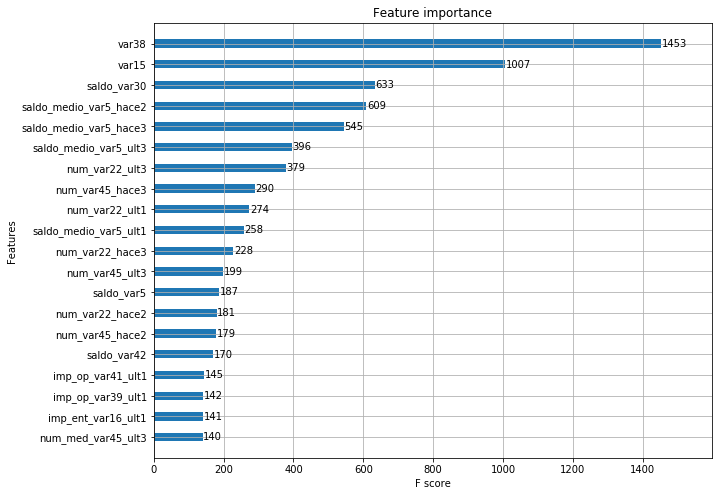

In [58]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [59]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165046	valid_0's auc: 0.817384
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.16	valid_0's auc: 0.81863
[3]	valid_0's binary_logloss: 0.156287	valid_0's auc: 0.827411
[4]	valid_0's binary_logloss: 0.153416	valid_0's auc: 0.832175
[5]	valid_0's binary_logloss: 0.151206	valid_0's auc: 0.83481
[6]	valid_0's binary_logloss: 0.149303	valid_0's auc: 0.834721
[7]	valid_0's binary_logloss: 0.147804	valid_0's auc: 0.83659
[8]	valid_0's binary_logloss: 0.146466	valid_0's auc: 0.837602
[9]	valid_0's binary_logloss: 0.145476	valid_0's auc: 0.838114
[10]	valid_0's binary_logloss: 0.144681	valid_0's auc: 0.838472
[11]	valid_0's binary_logloss: 0.143978	valid_0's auc: 0.83808
[12]	valid_0's binary_logloss: 0.14341	valid_0's auc: 0.837771
[13]	valid_0's binary_logloss: 0.142835	valid_0's auc: 0.838063
[14]	valid_0's binary_logloss: 0.142296	valid_0's auc: 0.838485
[15]	valid_0's binary_logloss: 0.141903	valid_0's auc: 0.83

[138]	valid_0's binary_logloss: 0.141136	valid_0's auc: 0.83503
[139]	valid_0's binary_logloss: 0.141206	valid_0's auc: 0.834826
[140]	valid_0's binary_logloss: 0.141267	valid_0's auc: 0.834576
[141]	valid_0's binary_logloss: 0.141328	valid_0's auc: 0.834265
[142]	valid_0's binary_logloss: 0.141359	valid_0's auc: 0.8342
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.139408	valid_0's auc: 0.839599
ROC AUC: 0.8396


In [60]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.156085	valid_0's auc: 0.820235	valid_1's binary_logloss: 0.164998	valid_1's auc: 0.81613
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.150951	valid_0's auc: 0.825775	valid_1's binary_logloss: 0.15988	valid_1's auc: 0.821831
[3]	valid_0's binary_logloss: 0.147167	valid_0's auc: 0.832192	valid_1's binary_logloss: 0.156397	valid_1's auc: 0.827302
[4]	valid_0's binary_logloss: 0.144131	valid_0's auc: 0.837518	valid_1's binary_logloss: 0.153325	valid_1's auc: 0.8334
[5]	valid_0's binary_logloss: 0.141651	valid_0's auc: 0.842289	valid_1's binary_logloss: 0.150959	valid_1's auc: 0.836018
[6]	valid_0's binary_logloss: 0.139661	valid_0's auc: 0.844974	valid_1's binary_logloss: 0.149046	valid_1's auc: 0.838022
[7]	valid_0's binary_logloss: 0.138001	valid_0's auc: 0.846623	valid_1's binary_logloss: 0.147509	valid_1's auc: 0.837777
[8]	valid_0's binary_logloss: 0.136578	valid_0's auc: 0.848529	valid_1's binary_logloss:

[29]	valid_0's binary_logloss: 0.124271	valid_0's auc: 0.87422	valid_1's binary_logloss: 0.139581	valid_1's auc: 0.839436
[30]	valid_0's binary_logloss: 0.124019	valid_0's auc: 0.874647	valid_1's binary_logloss: 0.13958	valid_1's auc: 0.83907
[31]	valid_0's binary_logloss: 0.123747	valid_0's auc: 0.875603	valid_1's binary_logloss: 0.139539	valid_1's auc: 0.839226
[32]	valid_0's binary_logloss: 0.123413	valid_0's auc: 0.87651	valid_1's binary_logloss: 0.139561	valid_1's auc: 0.838983
[33]	valid_0's binary_logloss: 0.123199	valid_0's auc: 0.877103	valid_1's binary_logloss: 0.139528	valid_1's auc: 0.839235
[34]	valid_0's binary_logloss: 0.122925	valid_0's auc: 0.878189	valid_1's binary_logloss: 0.139567	valid_1's auc: 0.839004
[35]	valid_0's binary_logloss: 0.122704	valid_0's auc: 0.878765	valid_1's binary_logloss: 0.139572	valid_1's auc: 0.838946
[36]	valid_0's binary_logloss: 0.122448	valid_0's auc: 0.879377	valid_1's binary_logloss: 0.139554	valid_1's auc: 0.83898
[37]	valid_0's binary

[39]	valid_0's binary_logloss: 0.122126	valid_0's auc: 0.879978	valid_1's binary_logloss: 0.139391	valid_1's auc: 0.83945
[40]	valid_0's binary_logloss: 0.121938	valid_0's auc: 0.880399	valid_1's binary_logloss: 0.139314	valid_1's auc: 0.840127
[41]	valid_0's binary_logloss: 0.121757	valid_0's auc: 0.880914	valid_1's binary_logloss: 0.13937	valid_1's auc: 0.839733
[42]	valid_0's binary_logloss: 0.121547	valid_0's auc: 0.881674	valid_1's binary_logloss: 0.139371	valid_1's auc: 0.839744
[43]	valid_0's binary_logloss: 0.121291	valid_0's auc: 0.882352	valid_1's binary_logloss: 0.139358	valid_1's auc: 0.839733
[44]	valid_0's binary_logloss: 0.121117	valid_0's auc: 0.882869	valid_1's binary_logloss: 0.13937	valid_1's auc: 0.839827
[45]	valid_0's binary_logloss: 0.120912	valid_0's auc: 0.883308	valid_1's binary_logloss: 0.139325	valid_1's auc: 0.839923
[46]	valid_0's binary_logloss: 0.120682	valid_0's auc: 0.883814	valid_1's binary_logloss: 0.139336	valid_1's auc: 0.83985
[47]	valid_0's binar

[13]	valid_0's binary_logloss: 0.131688	valid_0's auc: 0.858075	valid_1's binary_logloss: 0.142633	valid_1's auc: 0.837254
[14]	valid_0's binary_logloss: 0.130983	valid_0's auc: 0.858945	valid_1's binary_logloss: 0.142158	valid_1's auc: 0.837669
[15]	valid_0's binary_logloss: 0.130335	valid_0's auc: 0.859875	valid_1's binary_logloss: 0.141848	valid_1's auc: 0.837434
[16]	valid_0's binary_logloss: 0.129731	valid_0's auc: 0.860979	valid_1's binary_logloss: 0.141492	valid_1's auc: 0.837355
[17]	valid_0's binary_logloss: 0.129123	valid_0's auc: 0.861681	valid_1's binary_logloss: 0.14114	valid_1's auc: 0.837851
[18]	valid_0's binary_logloss: 0.128568	valid_0's auc: 0.863324	valid_1's binary_logloss: 0.140911	valid_1's auc: 0.838024
[19]	valid_0's binary_logloss: 0.128016	valid_0's auc: 0.864682	valid_1's binary_logloss: 0.140669	valid_1's auc: 0.838411
[20]	valid_0's binary_logloss: 0.127585	valid_0's auc: 0.865346	valid_1's binary_logloss: 0.140498	valid_1's auc: 0.838201
[21]	valid_0's bi

[21]	valid_0's binary_logloss: 0.127436	valid_0's auc: 0.866258	valid_1's binary_logloss: 0.140328	valid_1's auc: 0.83993
[22]	valid_0's binary_logloss: 0.127069	valid_0's auc: 0.867054	valid_1's binary_logloss: 0.14013	valid_1's auc: 0.840099
[23]	valid_0's binary_logloss: 0.126713	valid_0's auc: 0.867852	valid_1's binary_logloss: 0.140027	valid_1's auc: 0.839768
[24]	valid_0's binary_logloss: 0.126372	valid_0's auc: 0.868599	valid_1's binary_logloss: 0.139904	valid_1's auc: 0.840299
[25]	valid_0's binary_logloss: 0.126047	valid_0's auc: 0.869485	valid_1's binary_logloss: 0.139735	valid_1's auc: 0.840676
[26]	valid_0's binary_logloss: 0.125627	valid_0's auc: 0.870541	valid_1's binary_logloss: 0.139708	valid_1's auc: 0.840242
[27]	valid_0's binary_logloss: 0.125319	valid_0's auc: 0.871191	valid_1's binary_logloss: 0.139651	valid_1's auc: 0.839924
[28]	valid_0's binary_logloss: 0.125064	valid_0's auc: 0.871788	valid_1's binary_logloss: 0.139574	valid_1's auc: 0.839647
[29]	valid_0's bin

[34]	valid_0's binary_logloss: 0.117331	valid_0's auc: 0.892553	valid_1's binary_logloss: 0.141607	valid_1's auc: 0.82916
[35]	valid_0's binary_logloss: 0.116998	valid_0's auc: 0.893197	valid_1's binary_logloss: 0.141781	valid_1's auc: 0.828503
[36]	valid_0's binary_logloss: 0.116658	valid_0's auc: 0.894242	valid_1's binary_logloss: 0.141779	valid_1's auc: 0.828875
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.137695	valid_0's auc: 0.857012	valid_1's binary_logloss: 0.14943	valid_1's auc: 0.834623
[1]	valid_0's binary_logloss: 0.155723	valid_0's auc: 0.833054	valid_1's binary_logloss: 0.165042	valid_1's auc: 0.817048
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.149897	valid_0's auc: 0.840929	valid_1's binary_logloss: 0.159671	valid_1's auc: 0.820838
[3]	valid_0's binary_logloss: 0.14575	valid_0's auc: 0.85054	valid_1's binary_logloss: 0.156036	valid_1's auc: 0.827828
[4]	valid_0's binary_logloss: 0.14246	valid_0's au

[21]	valid_0's binary_logloss: 0.122562	valid_0's auc: 0.881898	valid_1's binary_logloss: 0.140914	valid_1's auc: 0.834984
[22]	valid_0's binary_logloss: 0.122011	valid_0's auc: 0.882919	valid_1's binary_logloss: 0.140596	valid_1's auc: 0.83655
[23]	valid_0's binary_logloss: 0.121524	valid_0's auc: 0.88356	valid_1's binary_logloss: 0.140423	valid_1's auc: 0.836903
[24]	valid_0's binary_logloss: 0.120948	valid_0's auc: 0.884733	valid_1's binary_logloss: 0.140282	valid_1's auc: 0.837346
[25]	valid_0's binary_logloss: 0.120481	valid_0's auc: 0.885783	valid_1's binary_logloss: 0.140158	valid_1's auc: 0.837461
[26]	valid_0's binary_logloss: 0.119965	valid_0's auc: 0.887006	valid_1's binary_logloss: 0.140169	valid_1's auc: 0.837303
[27]	valid_0's binary_logloss: 0.119452	valid_0's auc: 0.887947	valid_1's binary_logloss: 0.140113	valid_1's auc: 0.837557
[28]	valid_0's binary_logloss: 0.11903	valid_0's auc: 0.888786	valid_1's binary_logloss: 0.140154	valid_1's auc: 0.837108
[29]	valid_0's bina

[11]	valid_0's binary_logloss: 0.129981	valid_0's auc: 0.868477	valid_1's binary_logloss: 0.143351	valid_1's auc: 0.836388
[12]	valid_0's binary_logloss: 0.128907	valid_0's auc: 0.87007	valid_1's binary_logloss: 0.142803	valid_1's auc: 0.836122
[13]	valid_0's binary_logloss: 0.127994	valid_0's auc: 0.8711	valid_1's binary_logloss: 0.142243	valid_1's auc: 0.836547
[14]	valid_0's binary_logloss: 0.127122	valid_0's auc: 0.872903	valid_1's binary_logloss: 0.141718	valid_1's auc: 0.837837
[15]	valid_0's binary_logloss: 0.126262	valid_0's auc: 0.874543	valid_1's binary_logloss: 0.141291	valid_1's auc: 0.837921
[16]	valid_0's binary_logloss: 0.1255	valid_0's auc: 0.876148	valid_1's binary_logloss: 0.14114	valid_1's auc: 0.83698
[17]	valid_0's binary_logloss: 0.124724	valid_0's auc: 0.878214	valid_1's binary_logloss: 0.140905	valid_1's auc: 0.836901
[18]	valid_0's binary_logloss: 0.124053	valid_0's auc: 0.879554	valid_1's binary_logloss: 0.140787	valid_1's auc: 0.836497
[19]	valid_0's binary_l

[34]	valid_0's binary_logloss: 0.116711	valid_0's auc: 0.894331	valid_1's binary_logloss: 0.140111	valid_1's auc: 0.836404
[35]	valid_0's binary_logloss: 0.116306	valid_0's auc: 0.895331	valid_1's binary_logloss: 0.139942	valid_1's auc: 0.837102
[36]	valid_0's binary_logloss: 0.115973	valid_0's auc: 0.895954	valid_1's binary_logloss: 0.139958	valid_1's auc: 0.837138
[37]	valid_0's binary_logloss: 0.115673	valid_0's auc: 0.896701	valid_1's binary_logloss: 0.139954	valid_1's auc: 0.837045
[38]	valid_0's binary_logloss: 0.115335	valid_0's auc: 0.897344	valid_1's binary_logloss: 0.140026	valid_1's auc: 0.836585
[39]	valid_0's binary_logloss: 0.115043	valid_0's auc: 0.897605	valid_1's binary_logloss: 0.140104	valid_1's auc: 0.836359
[40]	valid_0's binary_logloss: 0.114754	valid_0's auc: 0.898073	valid_1's binary_logloss: 0.140096	valid_1's auc: 0.836432
[41]	valid_0's binary_logloss: 0.114389	valid_0's auc: 0.898701	valid_1's binary_logloss: 0.140115	valid_1's auc: 0.836355
[42]	valid_0's b

[24]	valid_0's binary_logloss: 0.126815	valid_0's auc: 0.866662	valid_1's binary_logloss: 0.139755	valid_1's auc: 0.837785
[25]	valid_0's binary_logloss: 0.126498	valid_0's auc: 0.867441	valid_1's binary_logloss: 0.139673	valid_1's auc: 0.838008
[26]	valid_0's binary_logloss: 0.126176	valid_0's auc: 0.86805	valid_1's binary_logloss: 0.139585	valid_1's auc: 0.838301
[27]	valid_0's binary_logloss: 0.12589	valid_0's auc: 0.868525	valid_1's binary_logloss: 0.139564	valid_1's auc: 0.838152
[28]	valid_0's binary_logloss: 0.125656	valid_0's auc: 0.869107	valid_1's binary_logloss: 0.139481	valid_1's auc: 0.838221
[29]	valid_0's binary_logloss: 0.12538	valid_0's auc: 0.869754	valid_1's binary_logloss: 0.139428	valid_1's auc: 0.838255
[30]	valid_0's binary_logloss: 0.125113	valid_0's auc: 0.87056	valid_1's binary_logloss: 0.139354	valid_1's auc: 0.838733
[31]	valid_0's binary_logloss: 0.124861	valid_0's auc: 0.871162	valid_1's binary_logloss: 0.139225	valid_1's auc: 0.838979
[32]	valid_0's binar

[57]	valid_0's binary_logloss: 0.120248	valid_0's auc: 0.88369	valid_1's binary_logloss: 0.139321	valid_1's auc: 0.839887
[58]	valid_0's binary_logloss: 0.120078	valid_0's auc: 0.884025	valid_1's binary_logloss: 0.139341	valid_1's auc: 0.839684
[59]	valid_0's binary_logloss: 0.119928	valid_0's auc: 0.884477	valid_1's binary_logloss: 0.139368	valid_1's auc: 0.839523
[60]	valid_0's binary_logloss: 0.119822	valid_0's auc: 0.884659	valid_1's binary_logloss: 0.139362	valid_1's auc: 0.839745
[61]	valid_0's binary_logloss: 0.119618	valid_0's auc: 0.885121	valid_1's binary_logloss: 0.139434	valid_1's auc: 0.839533
[62]	valid_0's binary_logloss: 0.119477	valid_0's auc: 0.885341	valid_1's binary_logloss: 0.139385	valid_1's auc: 0.839843
[63]	valid_0's binary_logloss: 0.119367	valid_0's auc: 0.885487	valid_1's binary_logloss: 0.139409	valid_1's auc: 0.839843
[64]	valid_0's binary_logloss: 0.119254	valid_0's auc: 0.885645	valid_1's binary_logloss: 0.139483	valid_1's auc: 0.839603
[65]	valid_0's bi

[13]	valid_0's binary_logloss: 0.132079	valid_0's auc: 0.857461	valid_1's binary_logloss: 0.142308	valid_1's auc: 0.838477
[14]	valid_0's binary_logloss: 0.131428	valid_0's auc: 0.858342	valid_1's binary_logloss: 0.141925	valid_1's auc: 0.838195
[15]	valid_0's binary_logloss: 0.130816	valid_0's auc: 0.858926	valid_1's binary_logloss: 0.141466	valid_1's auc: 0.838543
[16]	valid_0's binary_logloss: 0.130275	valid_0's auc: 0.859532	valid_1's binary_logloss: 0.141112	valid_1's auc: 0.838295
[17]	valid_0's binary_logloss: 0.129728	valid_0's auc: 0.860793	valid_1's binary_logloss: 0.140844	valid_1's auc: 0.837788
[18]	valid_0's binary_logloss: 0.12924	valid_0's auc: 0.861753	valid_1's binary_logloss: 0.140599	valid_1's auc: 0.837779
[19]	valid_0's binary_logloss: 0.12873	valid_0's auc: 0.86298	valid_1's binary_logloss: 0.14042	valid_1's auc: 0.837848
[20]	valid_0's binary_logloss: 0.128318	valid_0's auc: 0.863577	valid_1's binary_logloss: 0.140222	valid_1's auc: 0.837708
[21]	valid_0's binar

[46]	valid_0's binary_logloss: 0.122041	valid_0's auc: 0.879426	valid_1's binary_logloss: 0.139086	valid_1's auc: 0.839926
[47]	valid_0's binary_logloss: 0.121829	valid_0's auc: 0.879882	valid_1's binary_logloss: 0.139063	valid_1's auc: 0.840044
[48]	valid_0's binary_logloss: 0.121624	valid_0's auc: 0.880499	valid_1's binary_logloss: 0.139091	valid_1's auc: 0.840013
[49]	valid_0's binary_logloss: 0.121448	valid_0's auc: 0.880866	valid_1's binary_logloss: 0.139167	valid_1's auc: 0.839755
[50]	valid_0's binary_logloss: 0.121247	valid_0's auc: 0.881448	valid_1's binary_logloss: 0.139173	valid_1's auc: 0.839886
[51]	valid_0's binary_logloss: 0.121135	valid_0's auc: 0.881689	valid_1's binary_logloss: 0.139144	valid_1's auc: 0.840158
[52]	valid_0's binary_logloss: 0.12097	valid_0's auc: 0.882122	valid_1's binary_logloss: 0.139193	valid_1's auc: 0.839978
[53]	valid_0's binary_logloss: 0.120863	valid_0's auc: 0.882285	valid_1's binary_logloss: 0.139241	valid_1's auc: 0.83979
[54]	valid_0's bin

[39]	valid_0's binary_logloss: 0.117328	valid_0's auc: 0.892156	valid_1's binary_logloss: 0.140994	valid_1's auc: 0.830415
[40]	valid_0's binary_logloss: 0.117061	valid_0's auc: 0.892568	valid_1's binary_logloss: 0.140918	valid_1's auc: 0.830687
[41]	valid_0's binary_logloss: 0.11681	valid_0's auc: 0.893181	valid_1's binary_logloss: 0.140963	valid_1's auc: 0.830622
[42]	valid_0's binary_logloss: 0.116476	valid_0's auc: 0.893984	valid_1's binary_logloss: 0.140945	valid_1's auc: 0.830827
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.130311	valid_0's auc: 0.866817	valid_1's binary_logloss: 0.143404	valid_1's auc: 0.835592
[1]	valid_0's binary_logloss: 0.155919	valid_0's auc: 0.830452	valid_1's binary_logloss: 0.164895	valid_1's auc: 0.817465
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.150278	valid_0's auc: 0.843009	valid_1's binary_logloss: 0.159411	valid_1's auc: 0.828176
[3]	valid_0's binary_logloss: 0.146252	valid_

[12]	valid_0's binary_logloss: 0.13029	valid_0's auc: 0.86649	valid_1's binary_logloss: 0.142892	valid_1's auc: 0.837121
[13]	valid_0's binary_logloss: 0.129293	valid_0's auc: 0.869207	valid_1's binary_logloss: 0.142287	valid_1's auc: 0.837902
[14]	valid_0's binary_logloss: 0.128463	valid_0's auc: 0.870823	valid_1's binary_logloss: 0.141902	valid_1's auc: 0.838274
[15]	valid_0's binary_logloss: 0.127657	valid_0's auc: 0.871881	valid_1's binary_logloss: 0.141625	valid_1's auc: 0.83767
[16]	valid_0's binary_logloss: 0.126932	valid_0's auc: 0.873451	valid_1's binary_logloss: 0.141273	valid_1's auc: 0.837454
[17]	valid_0's binary_logloss: 0.126215	valid_0's auc: 0.874754	valid_1's binary_logloss: 0.14099	valid_1's auc: 0.837218
[18]	valid_0's binary_logloss: 0.125583	valid_0's auc: 0.876015	valid_1's binary_logloss: 0.140723	valid_1's auc: 0.837242
[19]	valid_0's binary_logloss: 0.125006	valid_0's auc: 0.876898	valid_1's binary_logloss: 0.140576	valid_1's auc: 0.836677
[20]	valid_0's binar

[37]	valid_0's binary_logloss: 0.117947	valid_0's auc: 0.890966	valid_1's binary_logloss: 0.140993	valid_1's auc: 0.830443
[38]	valid_0's binary_logloss: 0.117667	valid_0's auc: 0.891474	valid_1's binary_logloss: 0.141016	valid_1's auc: 0.830505
[39]	valid_0's binary_logloss: 0.117328	valid_0's auc: 0.892156	valid_1's binary_logloss: 0.140994	valid_1's auc: 0.830415
[40]	valid_0's binary_logloss: 0.117061	valid_0's auc: 0.892568	valid_1's binary_logloss: 0.140918	valid_1's auc: 0.830687
[41]	valid_0's binary_logloss: 0.11681	valid_0's auc: 0.893181	valid_1's binary_logloss: 0.140963	valid_1's auc: 0.830622
[42]	valid_0's binary_logloss: 0.116476	valid_0's auc: 0.893984	valid_1's binary_logloss: 0.140945	valid_1's auc: 0.830827
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.130311	valid_0's auc: 0.866817	valid_1's binary_logloss: 0.143404	valid_1's auc: 0.835592
[1]	valid_0's binary_logloss: 0.155919	valid_0's auc: 0.830452	valid_1's binary_logloss: 0.164895	valid_1

[12]	valid_0's binary_logloss: 0.13029	valid_0's auc: 0.86649	valid_1's binary_logloss: 0.142892	valid_1's auc: 0.837121
[13]	valid_0's binary_logloss: 0.129293	valid_0's auc: 0.869207	valid_1's binary_logloss: 0.142287	valid_1's auc: 0.837902
[14]	valid_0's binary_logloss: 0.128463	valid_0's auc: 0.870823	valid_1's binary_logloss: 0.141902	valid_1's auc: 0.838274
[15]	valid_0's binary_logloss: 0.127657	valid_0's auc: 0.871881	valid_1's binary_logloss: 0.141625	valid_1's auc: 0.83767
[16]	valid_0's binary_logloss: 0.126932	valid_0's auc: 0.873451	valid_1's binary_logloss: 0.141273	valid_1's auc: 0.837454
[17]	valid_0's binary_logloss: 0.126215	valid_0's auc: 0.874754	valid_1's binary_logloss: 0.14099	valid_1's auc: 0.837218
[18]	valid_0's binary_logloss: 0.125583	valid_0's auc: 0.876015	valid_1's binary_logloss: 0.140723	valid_1's auc: 0.837242
[19]	valid_0's binary_logloss: 0.125006	valid_0's auc: 0.876898	valid_1's binary_logloss: 0.140576	valid_1's auc: 0.836677
[20]	valid_0's binar

[1]	valid_0's binary_logloss: 0.156455	valid_0's auc: 0.814371	valid_1's binary_logloss: 0.16542	valid_1's auc: 0.813175
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.151083	valid_0's auc: 0.827201	valid_1's binary_logloss: 0.160085	valid_1's auc: 0.820013
[3]	valid_0's binary_logloss: 0.147235	valid_0's auc: 0.837003	valid_1's binary_logloss: 0.156463	valid_1's auc: 0.828713
[4]	valid_0's binary_logloss: 0.144235	valid_0's auc: 0.840971	valid_1's binary_logloss: 0.153575	valid_1's auc: 0.831369
[5]	valid_0's binary_logloss: 0.141803	valid_0's auc: 0.842902	valid_1's binary_logloss: 0.151283	valid_1's auc: 0.833329
[6]	valid_0's binary_logloss: 0.139776	valid_0's auc: 0.847067	valid_1's binary_logloss: 0.14937	valid_1's auc: 0.836625
[7]	valid_0's binary_logloss: 0.138056	valid_0's auc: 0.848894	valid_1's binary_logloss: 0.147778	valid_1's auc: 0.837174
[8]	valid_0's binary_logloss: 0.136579	valid_0's auc: 0.850546	valid_1's binary_loglos

[12]	valid_0's binary_logloss: 0.132622	valid_0's auc: 0.854501	valid_1's binary_logloss: 0.143407	valid_1's auc: 0.838294
[13]	valid_0's binary_logloss: 0.131808	valid_0's auc: 0.856936	valid_1's binary_logloss: 0.142866	valid_1's auc: 0.838199
[14]	valid_0's binary_logloss: 0.131166	valid_0's auc: 0.857673	valid_1's binary_logloss: 0.142532	valid_1's auc: 0.837548
[15]	valid_0's binary_logloss: 0.130533	valid_0's auc: 0.859044	valid_1's binary_logloss: 0.142166	valid_1's auc: 0.837939
[16]	valid_0's binary_logloss: 0.129973	valid_0's auc: 0.859941	valid_1's binary_logloss: 0.141803	valid_1's auc: 0.837854
[17]	valid_0's binary_logloss: 0.129377	valid_0's auc: 0.861036	valid_1's binary_logloss: 0.141476	valid_1's auc: 0.838222
[18]	valid_0's binary_logloss: 0.128809	valid_0's auc: 0.862799	valid_1's binary_logloss: 0.141125	valid_1's auc: 0.838732
[19]	valid_0's binary_logloss: 0.128328	valid_0's auc: 0.864128	valid_1's binary_logloss: 0.140763	valid_1's auc: 0.839441
[20]	valid_0's b

[31]	valid_0's binary_logloss: 0.124066	valid_0's auc: 0.875234	valid_1's binary_logloss: 0.140064	valid_1's auc: 0.83444
[32]	valid_0's binary_logloss: 0.123813	valid_0's auc: 0.875809	valid_1's binary_logloss: 0.140095	valid_1's auc: 0.834196
[33]	valid_0's binary_logloss: 0.123531	valid_0's auc: 0.876619	valid_1's binary_logloss: 0.140029	valid_1's auc: 0.834143
[34]	valid_0's binary_logloss: 0.123254	valid_0's auc: 0.877233	valid_1's binary_logloss: 0.140055	valid_1's auc: 0.833865
[35]	valid_0's binary_logloss: 0.123009	valid_0's auc: 0.877763	valid_1's binary_logloss: 0.140082	valid_1's auc: 0.833699
[36]	valid_0's binary_logloss: 0.122755	valid_0's auc: 0.878322	valid_1's binary_logloss: 0.140158	valid_1's auc: 0.833221
[37]	valid_0's binary_logloss: 0.122495	valid_0's auc: 0.878948	valid_1's binary_logloss: 0.14018	valid_1's auc: 0.832792
[38]	valid_0's binary_logloss: 0.122301	valid_0's auc: 0.879452	valid_1's binary_logloss: 0.140154	valid_1's auc: 0.832977
[39]	valid_0's bin

[1]	valid_0's binary_logloss: 0.156526	valid_0's auc: 0.821645	valid_1's binary_logloss: 0.165099	valid_1's auc: 0.81857
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.151185	valid_0's auc: 0.827652	valid_1's binary_logloss: 0.160085	valid_1's auc: 0.82254
[3]	valid_0's binary_logloss: 0.14726	valid_0's auc: 0.836059	valid_1's binary_logloss: 0.156604	valid_1's auc: 0.828119
[4]	valid_0's binary_logloss: 0.144255	valid_0's auc: 0.840512	valid_1's binary_logloss: 0.153569	valid_1's auc: 0.831906
[5]	valid_0's binary_logloss: 0.141762	valid_0's auc: 0.841872	valid_1's binary_logloss: 0.151256	valid_1's auc: 0.834269
[6]	valid_0's binary_logloss: 0.139748	valid_0's auc: 0.844933	valid_1's binary_logloss: 0.149358	valid_1's auc: 0.835284
[7]	valid_0's binary_logloss: 0.138081	valid_0's auc: 0.845797	valid_1's binary_logloss: 0.147852	valid_1's auc: 0.834956
[8]	valid_0's binary_logloss: 0.136692	valid_0's auc: 0.847134	valid_1's binary_logloss

[10]	valid_0's binary_logloss: 0.131394	valid_0's auc: 0.866071	valid_1's binary_logloss: 0.144785	valid_1's auc: 0.834473
[11]	valid_0's binary_logloss: 0.130276	valid_0's auc: 0.867641	valid_1's binary_logloss: 0.144038	valid_1's auc: 0.834299
[12]	valid_0's binary_logloss: 0.129189	valid_0's auc: 0.869161	valid_1's binary_logloss: 0.143493	valid_1's auc: 0.834149
[13]	valid_0's binary_logloss: 0.128249	valid_0's auc: 0.870667	valid_1's binary_logloss: 0.14314	valid_1's auc: 0.833217
[14]	valid_0's binary_logloss: 0.127379	valid_0's auc: 0.872337	valid_1's binary_logloss: 0.14275	valid_1's auc: 0.833305
[15]	valid_0's binary_logloss: 0.126538	valid_0's auc: 0.873712	valid_1's binary_logloss: 0.14257	valid_1's auc: 0.832635
[16]	valid_0's binary_logloss: 0.12582	valid_0's auc: 0.874704	valid_1's binary_logloss: 0.142228	valid_1's auc: 0.832562
[17]	valid_0's binary_logloss: 0.125162	valid_0's auc: 0.875722	valid_1's binary_logloss: 0.142052	valid_1's auc: 0.832021
[18]	valid_0's binar

[40]	valid_0's binary_logloss: 0.114372	valid_0's auc: 0.900215	valid_1's binary_logloss: 0.139865	valid_1's auc: 0.837001
[41]	valid_0's binary_logloss: 0.114036	valid_0's auc: 0.900847	valid_1's binary_logloss: 0.139874	valid_1's auc: 0.837156
[42]	valid_0's binary_logloss: 0.113757	valid_0's auc: 0.901233	valid_1's binary_logloss: 0.139879	valid_1's auc: 0.837341
[43]	valid_0's binary_logloss: 0.113498	valid_0's auc: 0.901621	valid_1's binary_logloss: 0.139982	valid_1's auc: 0.837116
[44]	valid_0's binary_logloss: 0.113194	valid_0's auc: 0.902271	valid_1's binary_logloss: 0.140012	valid_1's auc: 0.836966
[45]	valid_0's binary_logloss: 0.112949	valid_0's auc: 0.902522	valid_1's binary_logloss: 0.140035	valid_1's auc: 0.836915
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.126262	valid_0's auc: 0.874543	valid_1's binary_logloss: 0.141291	valid_1's auc: 0.837921
[1]	valid_0's binary_logloss: 0.155755	valid_0's auc: 0.830649	valid_1's binary_logloss: 0.164976	valid_

[20]	valid_0's binary_logloss: 0.123373	valid_0's auc: 0.87956	valid_1's binary_logloss: 0.141701	valid_1's auc: 0.83106
[21]	valid_0's binary_logloss: 0.122832	valid_0's auc: 0.880405	valid_1's binary_logloss: 0.14165	valid_1's auc: 0.830305
[22]	valid_0's binary_logloss: 0.122355	valid_0's auc: 0.881423	valid_1's binary_logloss: 0.141656	valid_1's auc: 0.830239
[23]	valid_0's binary_logloss: 0.121843	valid_0's auc: 0.882393	valid_1's binary_logloss: 0.141537	valid_1's auc: 0.830552
[24]	valid_0's binary_logloss: 0.121284	valid_0's auc: 0.884118	valid_1's binary_logloss: 0.141426	valid_1's auc: 0.830946
[25]	valid_0's binary_logloss: 0.120821	valid_0's auc: 0.885236	valid_1's binary_logloss: 0.141489	valid_1's auc: 0.829956
[26]	valid_0's binary_logloss: 0.120378	valid_0's auc: 0.886368	valid_1's binary_logloss: 0.141559	valid_1's auc: 0.829528
[27]	valid_0's binary_logloss: 0.119952	valid_0's auc: 0.88693	valid_1's binary_logloss: 0.141578	valid_1's auc: 0.829491
[28]	valid_0's binar

[11]	valid_0's binary_logloss: 0.13038	valid_0's auc: 0.865032	valid_1's binary_logloss: 0.143965	valid_1's auc: 0.835477
[12]	valid_0's binary_logloss: 0.12931	valid_0's auc: 0.867552	valid_1's binary_logloss: 0.14326	valid_1's auc: 0.837042
[13]	valid_0's binary_logloss: 0.128333	valid_0's auc: 0.870662	valid_1's binary_logloss: 0.142696	valid_1's auc: 0.837981
[14]	valid_0's binary_logloss: 0.127408	valid_0's auc: 0.872498	valid_1's binary_logloss: 0.142262	valid_1's auc: 0.837713
[15]	valid_0's binary_logloss: 0.126603	valid_0's auc: 0.873589	valid_1's binary_logloss: 0.141869	valid_1's auc: 0.837256
[16]	valid_0's binary_logloss: 0.125783	valid_0's auc: 0.875441	valid_1's binary_logloss: 0.141528	valid_1's auc: 0.837912
[17]	valid_0's binary_logloss: 0.125036	valid_0's auc: 0.877154	valid_1's binary_logloss: 0.141384	valid_1's auc: 0.836689
[18]	valid_0's binary_logloss: 0.124367	valid_0's auc: 0.878205	valid_1's binary_logloss: 0.141256	valid_1's auc: 0.835872
[19]	valid_0's bina

[36]	valid_0's binary_logloss: 0.124165	valid_0's auc: 0.87467	valid_1's binary_logloss: 0.140029	valid_1's auc: 0.833345
[37]	valid_0's binary_logloss: 0.123937	valid_0's auc: 0.875299	valid_1's binary_logloss: 0.140009	valid_1's auc: 0.833447
[38]	valid_0's binary_logloss: 0.123686	valid_0's auc: 0.876178	valid_1's binary_logloss: 0.139986	valid_1's auc: 0.833499
[39]	valid_0's binary_logloss: 0.123446	valid_0's auc: 0.876802	valid_1's binary_logloss: 0.139955	valid_1's auc: 0.833868
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.135881	valid_0's auc: 0.849213	valid_1's binary_logloss: 0.1453	valid_1's auc: 0.838015
[1]	valid_0's binary_logloss: 0.156469	valid_0's auc: 0.821831	valid_1's binary_logloss: 0.165188	valid_1's auc: 0.817525
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.151109	valid_0's auc: 0.830014	valid_1's binary_logloss: 0.159651	valid_1's auc: 0.823491
[3]	valid_0's binary_logloss: 0.147325	valid_0's

[25]	valid_0's binary_logloss: 0.126759	valid_0's auc: 0.867646	valid_1's binary_logloss: 0.13986	valid_1's auc: 0.83898
[26]	valid_0's binary_logloss: 0.126486	valid_0's auc: 0.868321	valid_1's binary_logloss: 0.139795	valid_1's auc: 0.83866
[27]	valid_0's binary_logloss: 0.126137	valid_0's auc: 0.869533	valid_1's binary_logloss: 0.13973	valid_1's auc: 0.838474
[28]	valid_0's binary_logloss: 0.125841	valid_0's auc: 0.87009	valid_1's binary_logloss: 0.139661	valid_1's auc: 0.838418
[29]	valid_0's binary_logloss: 0.125574	valid_0's auc: 0.870611	valid_1's binary_logloss: 0.139586	valid_1's auc: 0.838527
[30]	valid_0's binary_logloss: 0.125351	valid_0's auc: 0.871288	valid_1's binary_logloss: 0.139533	valid_1's auc: 0.838578
[31]	valid_0's binary_logloss: 0.125092	valid_0's auc: 0.871941	valid_1's binary_logloss: 0.139431	valid_1's auc: 0.839062
[32]	valid_0's binary_logloss: 0.124816	valid_0's auc: 0.872841	valid_1's binary_logloss: 0.139362	valid_1's auc: 0.839243
[33]	valid_0's binary

[14]	valid_0's binary_logloss: 0.131638	valid_0's auc: 0.855718	valid_1's binary_logloss: 0.142224	valid_1's auc: 0.835694
[15]	valid_0's binary_logloss: 0.131049	valid_0's auc: 0.856954	valid_1's binary_logloss: 0.141812	valid_1's auc: 0.835368
[16]	valid_0's binary_logloss: 0.130502	valid_0's auc: 0.857856	valid_1's binary_logloss: 0.141587	valid_1's auc: 0.834835
[17]	valid_0's binary_logloss: 0.129988	valid_0's auc: 0.85911	valid_1's binary_logloss: 0.141283	valid_1's auc: 0.835354
[18]	valid_0's binary_logloss: 0.129489	valid_0's auc: 0.860451	valid_1's binary_logloss: 0.141081	valid_1's auc: 0.835311
[19]	valid_0's binary_logloss: 0.129065	valid_0's auc: 0.861474	valid_1's binary_logloss: 0.140992	valid_1's auc: 0.834787
[20]	valid_0's binary_logloss: 0.128653	valid_0's auc: 0.862401	valid_1's binary_logloss: 0.140795	valid_1's auc: 0.834345
[21]	valid_0's binary_logloss: 0.128288	valid_0's auc: 0.86312	valid_1's binary_logloss: 0.140723	valid_1's auc: 0.833804
[22]	valid_0's bin

[13]	valid_0's binary_logloss: 0.13232	valid_0's auc: 0.856392	valid_1's binary_logloss: 0.14296	valid_1's auc: 0.837517
[14]	valid_0's binary_logloss: 0.131636	valid_0's auc: 0.857549	valid_1's binary_logloss: 0.142542	valid_1's auc: 0.837302
[15]	valid_0's binary_logloss: 0.131026	valid_0's auc: 0.858338	valid_1's binary_logloss: 0.142141	valid_1's auc: 0.837003
[16]	valid_0's binary_logloss: 0.130449	valid_0's auc: 0.859394	valid_1's binary_logloss: 0.141779	valid_1's auc: 0.836672
[17]	valid_0's binary_logloss: 0.129926	valid_0's auc: 0.860095	valid_1's binary_logloss: 0.141395	valid_1's auc: 0.83723
[18]	valid_0's binary_logloss: 0.129444	valid_0's auc: 0.861058	valid_1's binary_logloss: 0.141105	valid_1's auc: 0.837871
[19]	valid_0's binary_logloss: 0.128997	valid_0's auc: 0.862258	valid_1's binary_logloss: 0.140829	valid_1's auc: 0.83794
[20]	valid_0's binary_logloss: 0.128569	valid_0's auc: 0.863204	valid_1's binary_logloss: 0.140558	valid_1's auc: 0.838426
[21]	valid_0's binar

[12]	valid_0's binary_logloss: 0.130311	valid_0's auc: 0.866817	valid_1's binary_logloss: 0.143404	valid_1's auc: 0.835592
[13]	valid_0's binary_logloss: 0.129388	valid_0's auc: 0.868751	valid_1's binary_logloss: 0.142853	valid_1's auc: 0.835225
[14]	valid_0's binary_logloss: 0.128551	valid_0's auc: 0.870283	valid_1's binary_logloss: 0.142412	valid_1's auc: 0.835191
[15]	valid_0's binary_logloss: 0.127828	valid_0's auc: 0.871366	valid_1's binary_logloss: 0.142173	valid_1's auc: 0.834681
[16]	valid_0's binary_logloss: 0.127146	valid_0's auc: 0.87234	valid_1's binary_logloss: 0.141876	valid_1's auc: 0.834555
[17]	valid_0's binary_logloss: 0.126553	valid_0's auc: 0.872963	valid_1's binary_logloss: 0.141845	valid_1's auc: 0.833341
[18]	valid_0's binary_logloss: 0.125934	valid_0's auc: 0.874019	valid_1's binary_logloss: 0.141515	valid_1's auc: 0.833684
[19]	valid_0's binary_logloss: 0.125352	valid_0's auc: 0.875288	valid_1's binary_logloss: 0.141499	valid_1's auc: 0.832788
[20]	valid_0's bi

[37]	valid_0's binary_logloss: 0.117095	valid_0's auc: 0.893672	valid_1's binary_logloss: 0.139109	valid_1's auc: 0.838499
[38]	valid_0's binary_logloss: 0.116783	valid_0's auc: 0.894575	valid_1's binary_logloss: 0.139067	valid_1's auc: 0.83897
[39]	valid_0's binary_logloss: 0.116421	valid_0's auc: 0.895447	valid_1's binary_logloss: 0.139143	valid_1's auc: 0.838515
[40]	valid_0's binary_logloss: 0.116084	valid_0's auc: 0.896177	valid_1's binary_logloss: 0.13918	valid_1's auc: 0.838353
[41]	valid_0's binary_logloss: 0.115822	valid_0's auc: 0.896821	valid_1's binary_logloss: 0.139263	valid_1's auc: 0.837933
[42]	valid_0's binary_logloss: 0.115503	valid_0's auc: 0.897531	valid_1's binary_logloss: 0.139286	valid_1's auc: 0.838083
[43]	valid_0's binary_logloss: 0.115195	valid_0's auc: 0.898208	valid_1's binary_logloss: 0.139312	valid_1's auc: 0.838087
[44]	valid_0's binary_logloss: 0.114921	valid_0's auc: 0.899032	valid_1's binary_logloss: 0.139352	valid_1's auc: 0.837956
[45]	valid_0's bin

[11]	valid_0's binary_logloss: 0.13134	valid_0's auc: 0.865339	valid_1's binary_logloss: 0.144034	valid_1's auc: 0.835252
[12]	valid_0's binary_logloss: 0.130311	valid_0's auc: 0.866817	valid_1's binary_logloss: 0.143404	valid_1's auc: 0.835592
[13]	valid_0's binary_logloss: 0.129388	valid_0's auc: 0.868751	valid_1's binary_logloss: 0.142853	valid_1's auc: 0.835225
[14]	valid_0's binary_logloss: 0.128551	valid_0's auc: 0.870283	valid_1's binary_logloss: 0.142412	valid_1's auc: 0.835191
[15]	valid_0's binary_logloss: 0.127828	valid_0's auc: 0.871366	valid_1's binary_logloss: 0.142173	valid_1's auc: 0.834681
[16]	valid_0's binary_logloss: 0.127146	valid_0's auc: 0.87234	valid_1's binary_logloss: 0.141876	valid_1's auc: 0.834555
[17]	valid_0's binary_logloss: 0.126553	valid_0's auc: 0.872963	valid_1's binary_logloss: 0.141845	valid_1's auc: 0.833341
[18]	valid_0's binary_logloss: 0.125934	valid_0's auc: 0.874019	valid_1's binary_logloss: 0.141515	valid_1's auc: 0.833684
[19]	valid_0's bin

[42]	valid_0's binary_logloss: 0.115503	valid_0's auc: 0.897531	valid_1's binary_logloss: 0.139286	valid_1's auc: 0.838083
[43]	valid_0's binary_logloss: 0.115195	valid_0's auc: 0.898208	valid_1's binary_logloss: 0.139312	valid_1's auc: 0.838087
[44]	valid_0's binary_logloss: 0.114921	valid_0's auc: 0.899032	valid_1's binary_logloss: 0.139352	valid_1's auc: 0.837956
[45]	valid_0's binary_logloss: 0.114646	valid_0's auc: 0.899435	valid_1's binary_logloss: 0.139425	valid_1's auc: 0.837664
[46]	valid_0's binary_logloss: 0.114381	valid_0's auc: 0.899904	valid_1's binary_logloss: 0.139562	valid_1's auc: 0.837191
[47]	valid_0's binary_logloss: 0.114172	valid_0's auc: 0.900313	valid_1's binary_logloss: 0.139576	valid_1's auc: 0.837275
[48]	valid_0's binary_logloss: 0.113898	valid_0's auc: 0.900881	valid_1's binary_logloss: 0.139641	valid_1's auc: 0.837102
[49]	valid_0's binary_logloss: 0.11361	valid_0's auc: 0.901416	valid_1's binary_logloss: 0.139694	valid_1's auc: 0.837064
Early stopping, b

[22]	valid_0's binary_logloss: 0.126309	valid_0's auc: 0.871544	valid_1's binary_logloss: 0.139253	valid_1's auc: 0.844171
[23]	valid_0's binary_logloss: 0.125895	valid_0's auc: 0.872657	valid_1's binary_logloss: 0.139093	valid_1's auc: 0.843901
[24]	valid_0's binary_logloss: 0.125508	valid_0's auc: 0.873871	valid_1's binary_logloss: 0.139015	valid_1's auc: 0.843814
[25]	valid_0's binary_logloss: 0.125076	valid_0's auc: 0.875385	valid_1's binary_logloss: 0.138915	valid_1's auc: 0.843672
[26]	valid_0's binary_logloss: 0.12471	valid_0's auc: 0.876436	valid_1's binary_logloss: 0.138828	valid_1's auc: 0.843894
[27]	valid_0's binary_logloss: 0.124381	valid_0's auc: 0.877113	valid_1's binary_logloss: 0.138723	valid_1's auc: 0.843845
[28]	valid_0's binary_logloss: 0.12406	valid_0's auc: 0.878144	valid_1's binary_logloss: 0.138681	valid_1's auc: 0.843817
[29]	valid_0's binary_logloss: 0.123721	valid_0's auc: 0.879271	valid_1's binary_logloss: 0.13859	valid_1's auc: 0.844032
[30]	valid_0's bina

In [61]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165016	valid_0's auc: 0.819488
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.159711	valid_0's auc: 0.822387
[3]	valid_0's binary_logloss: 0.156068	valid_0's auc: 0.829542
[4]	valid_0's binary_logloss: 0.153141	valid_0's auc: 0.834917
[5]	valid_0's binary_logloss: 0.150804	valid_0's auc: 0.837871
[6]	valid_0's binary_logloss: 0.148876	valid_0's auc: 0.839548
[7]	valid_0's binary_logloss: 0.147225	valid_0's auc: 0.841812
[8]	valid_0's binary_logloss: 0.14594	valid_0's auc: 0.842382
[9]	valid_0's binary_logloss: 0.144866	valid_0's auc: 0.842811
[10]	valid_0's binary_logloss: 0.143872	valid_0's auc: 0.843186
[11]	valid_0's binary_logloss: 0.14305	valid_0's auc: 0.843465
[12]	valid_0's binary_logloss: 0.142376	valid_0's auc: 0.843222
[13]	valid_0's binary_logloss: 0.141783	valid_0's auc: 0.843564
[14]	valid_0's binary_logloss: 0.141419	valid_0's auc: 0.843389
[15]	valid_0's binary_logloss: 0.141	valid_0's auc: 

In [62]:
#캐글 신용카드 사기 검출(conda install -c conda-forge imbalanced-learn)

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('4_data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [66]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [67]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [69]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.8040


In [70]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [71]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.8783


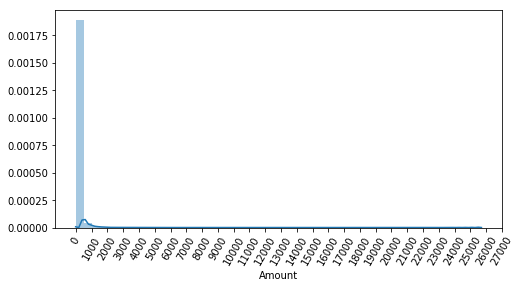

In [72]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [73]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [74]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.8040
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.8783


In [75]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [76]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081,    F1: 0.7200, AUC:0.8040
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.8817


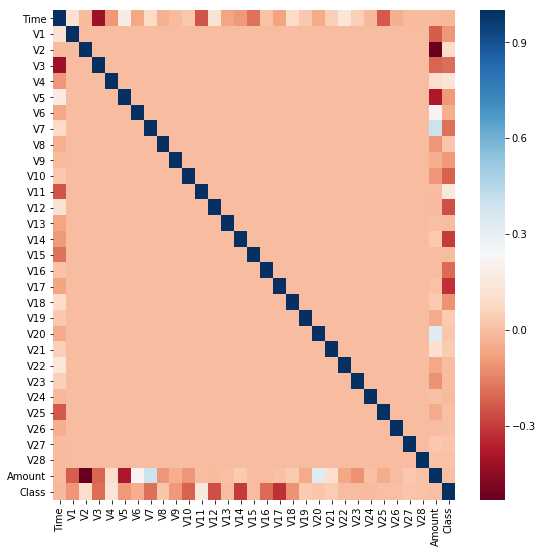

In [77]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [78]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [79]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [80]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8829, 재현율: 0.6712,    F1: 0.7626, AUC:0.8355
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9144


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
dtype: int64


In [82]:

lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82932  2363]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0540, 재현율: 0.9247,    F1: 0.1021, AUC:0.9485


In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

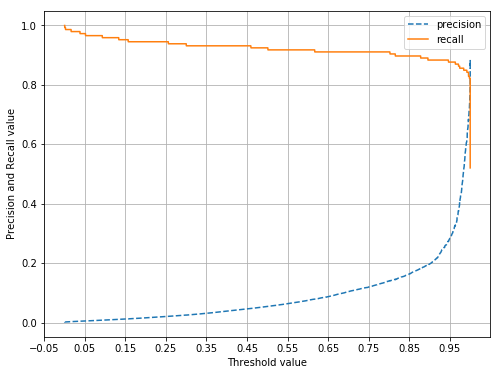

In [84]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [85]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9246


In [86]:
#스태킹 앙상블

In [87]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [88]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [89]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561 :


In [90]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [91]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [93]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [94]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [95]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
